In [40]:
!pip install imutils

Processing /home/ec2-user/.cache/pip/wheels/27/4d/3a/6dcdf7c3ebc87bf1ae013d96c9cf060ccfe334bb5ee769f377/imutils-0.5.3-py3-none-any.whl
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [1]:
import cv2
import matplotlib.pyplot as plt

In [33]:
import numpy as np

In [41]:
import imutils

In [114]:
img=cv2.imread('people.jpg')

* We cannot display image, using cv2 so we will use matplotlib, but we have to change the order of channels

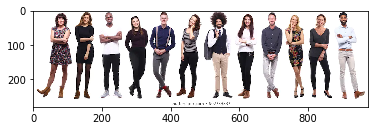

In [115]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## We will try to isolate, the pixels from background, in this way we will count objects

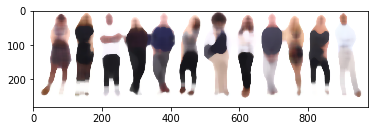

In [116]:
image_blur=cv2.medianBlur(img,25)
plt.imshow(cv2.cvtColor(image_blur,cv2.COLOR_BGR2RGB))

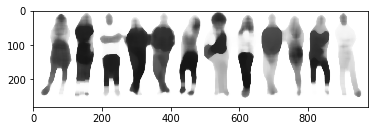

In [117]:
image_blur_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image_blur_gray,cv2.COLOR_BGR2RGB))

### For diving deep into cv2.threshold, please refer to following site:

* https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/

In [118]:
image_res ,image_thresh = cv2.threshold(image_blur_gray,235,255,cv2.THRESH_BINARY_INV)


In [119]:
print(image_thresh)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [120]:
kernel = np.ones((3,3),np.uint8)


## You can read this article for deep understanding of Morphological Transformations of images with OpenCV
* https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38

In [121]:
opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel) 


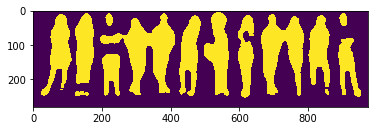

In [122]:
plt.imshow(opening)

In [123]:

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.002*dist_transform.max(),255,0)
last_image = np.uint8(last_image)

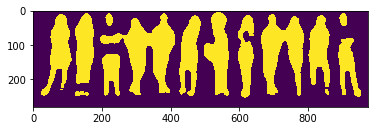

In [124]:
plt.imshow(last_image)

### For more information about cv2.findContours, please refer to this link:

* https://www.geeksforgeeks.org/find-and-draw-contours-using-opencv-python/

In [125]:

cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [126]:
cnts[0].shape

(34, 1, 2)

### This method is not that much, accurate, but if you have objects that are clearly distinguished from background, then it is an easy way around.But if Interested Objects, merge with background(That are in this image), then accuracy is compromised.

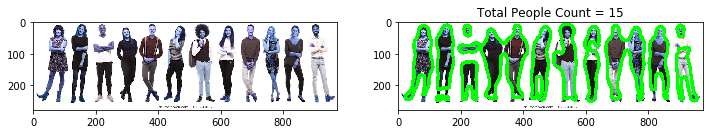

In [128]:
def display(img,count,cmap="gray"):
    f_image = cv2.imread("people.jpg")
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total People Count = {}".format(count))

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
#	cv2.putText(img, "#{}".format(i + 1), (int(x) - 45, int(y)+20),
#		cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)
	cv2.drawContours(img, [c], -1, (0, 255, 0), 10)

display(img,len(cnts))

In [130]:
for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
#	cv2.putText(img, "#{}".format(i + 1), (int(x) - 45, int(y)+20),
#		cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)
	img_con=cv2.drawContours(img, [c], -1, (0, 255, 0), 10)

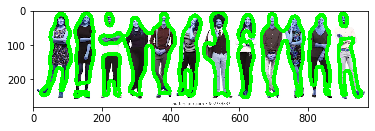

In [131]:
cv2.imwrite('segmented.jpg')